In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from datetime import datetime
import requests
from io import BytesIO
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler

solar = pd.read_csv('solar_daily_agg.csv')
solar_df = pd.read_csv('solar_daily_agg.csv')
solar_df['Date_Time'] = pd.to_datetime(solar_df['Date_Time'])

solar_df.rename(columns={'Electricity_KW_HR_AVG':'Electricity_KW_HR'}, inplace=True)

In [2]:
solar_df.head(2)
solar_df.shape

(1677, 62)

In [3]:
time = solar_df[['Date_Time', 'Electricity_KW_HR']]
del solar_df['Date_Time']
del solar_df['Electricity_KW_HR']
solar_df.head()

,Solar_Elevation_AVG,Cloud_Cover_Fraction_AVG,Dew_Point_AVG,Humidity_Fraction_AVG,Precipitation_AVG,Temperature_AVG,Visibility_AVG,Wind_Speed_AVG,Month_1,Month_2,...,Day_of_week_1,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_6,Day_of_week_7,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,13.121416,1.000000,-8.300000,0.698400,0.000000,-3.600000,16.093000,4.650000,1,0,...,0,1,0,0,0,0,0,0,0,1
1,16.887491,1.000000,-7.000000,0.789400,0.000000,-3.875000,15.087250,4.250000,1,0,...,0,0,1,0,0,0,0,0,0,1
2,16.993047,1.000000,-6.950000,0.768500,0.000000,-3.475000,16.093000,3.475000,1,0,...,0,0,0,1,0,0,0,0,0,1
3,18.097402,0.985714,-6.442857,0.865729,0.071429,-4.528571,11.954857,1.271429,1,0,...,0,0,0,0,0,0,0,0,0,1
4,17.224088,0.987500,-11.062500,0.723738,0.000000,-6.937500,15.288500,5.212500,1,0,...,0,0,0,0,1,0,0,0,0,1


In [4]:
scaler = MinMaxScaler()
scaler.fit(solar_df)

exo = pd.DataFrame(scaler.transform(solar_df))

C:\Users\sajor\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [5]:
train_time = np.array(time.Electricity_KW_HR[0:1341])
test_time = np.array(time.Electricity_KW_HR[1341:])
train_exo = np.array(exo[0:1341])
test_exo = np.array(exo[1341:])

In [6]:
train_time.shape

(1341,)

In [7]:
train_exo.shape

(1341, 60)

In [8]:
model = SARIMAX(train_time, exog=train_exo, order=(1, 0, 2), seasonal_order=(0, 0, 0, 0))

In [9]:
model_fit = model.fit(disp=True)

In [18]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1341
Model:               SARIMAX(1, 0, 2)   Log Likelihood              -14888.390
Date:                Thu, 31 Oct 2019   AIC                          29904.780
Time:                        01:24:24   BIC                          30237.655
Sample:                             0   HQIC                         30029.483
                               - 1341                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.663e+04   9644.693      1.724      0.085   -2275.009    3.55e+04
x2         -6.243e+04   1665.903    -37.474      0.000   -6.57e+04   -5.92e+04
x3          9.278e+04   4.63e+04      2.005      0.045    2097.560    1.83e+05
x4         -7.852e+04   1.82e+04     -4.308      0.000   -1.14e+05   -4.28e+04
x5         -1.523e+04   1.07e+04     -1.420      0.156   -3.63e+04    5792.128
x6         -1.238e+05   4.58e+04     -2.704      0.007   -2.14e+05   -3.41e+04
x7          1.052e+04   3985.525      2.640      0.008    2711.606    1.83e+04
x8         -6160.1870   3050.684     -2.019      0.043   -1.21e+04    -180.956
x9           2.93e+04   4314.745      6.792      0.000    2.08e+04    3.78e+04
x10          3.97e+04   4034.866      9.838      0.000    3.18e+04    4.76e+04
x11         4.229e+04   3890.107     10.872      0.000    3.47e+04    4.99e+04
x12         3.809e+04   4852.520      7.850      0.000    2.86e+04    4.76e+04
x13         3.198e+04   5675.748      5.634      0.000    2.09e+04    4.31e+04
x14          3.43e+04   5873.215      5.840      0.000    2.28e+04    4.58e+04
x15         3.105e+04   5822.667      5.332      0.000    1.96e+04    4.25e+04
x16         3.743e+04   5367.671      6.974      0.000    2.69e+04     4.8e+04
x17         4.083e+04   4430.470      9.216      0.000    3.21e+04    4.95e+04
x18         4.217e+04   4321.534      9.758      0.000    3.37e+04    5.06e+04
x19         3.187e+04   4444.245      7.171      0.000    2.32e+04    4.06e+04
x20         3.235e+04   4399.366      7.354      0.000    2.37e+04     4.1e+04
x21        -1460.8434   3992.433     -0.366      0.714   -9285.869    6364.182
x22        -1437.8988   3852.798     -0.373      0.709   -8989.245    6113.447
x23         -417.6134   4036.199     -0.103      0.918   -8328.419    7493.192
x24        -1961.9094   3849.265     -0.510      0.610   -9506.329    5582.511
x25        -2804.3883   4354.247     -0.644      0.520   -1.13e+04    5729.779
x26        -2104.4914   4032.506     -0.522      0.602      -1e+04    5799.076
x27          -82.3226   3825.912     -0.022      0.983   -7580.973    7416.328
x28          402.5006   3768.073      0.107      0.915   -6982.786    7787.787
x29         4787.2513   3704.870      1.292      0.196   -2474.160     1.2e+04
x30        -1202.0421   3669.361     -0.328      0.743   -8393.857    5989.773
x31          416.7796   3548.588      0.117      0.907   -6538.326    7371.885
x32        -1225.5112   4451.549     -0.275      0.783   -9950.387    7499.364
x33        -4217.5178   3659.489     -1.152      0.249   -1.14e+04    2954.949
x34        -4760.3421   3877.941     -1.228      0.220   -1.24e+04    2840.284
x35          426.0162   3915.900      0.109      0.913   -7249.007    8101.039
x36         2719.2491   4053.167      0.671      0.502   -5224.812    1.07e+04
x37        -5377.8654   3774.425     -1.425      0.154   -1.28e+04    2019.872
x38          -52.6982   3959.668     -0.013      0.989   -7813.505    7708.108
x3

In [10]:
test_exo.shape

(336, 60)

In [11]:
fc = model_fit.forecast(336, alpha=0.05, exog = pd.DataFrame(test_exo) )

In [12]:
#fc

In [13]:
actual = pd.DataFrame(test_time)
actual.index = time.Date_Time[1341:]
forecast = pd.DataFrame(fc)
forecast.index = actual.index
train= pd.DataFrame(train_time)
train.index = time.Date_Time[:1341]


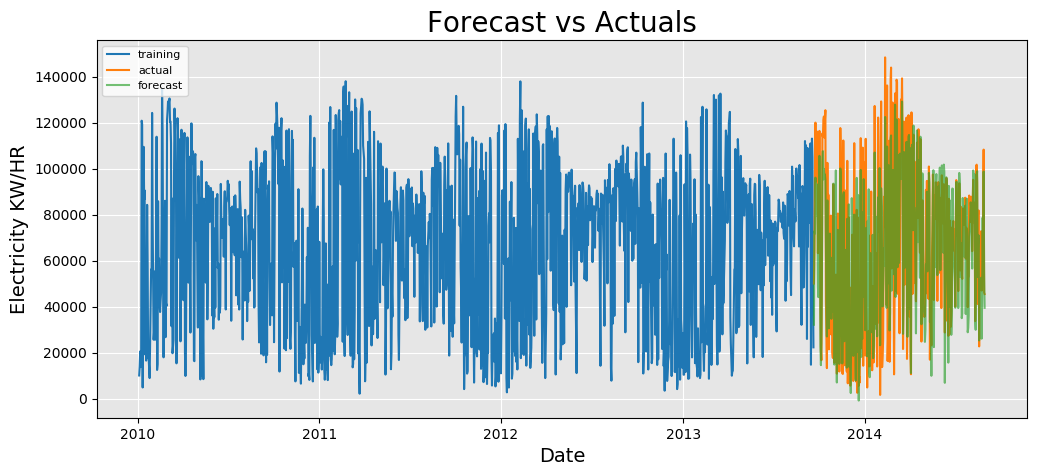

In [17]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
# use a gray background
ax = plt.axes(facecolor='#E6E6E6')
ax.set_axisbelow(True)
# draw solid white grid lines
plt.grid(color='w', linestyle='solid')
plt.plot(train, label='training')
plt.plot(actual, label='actual')
plt.plot(forecast, label='forecast', alpha = 0.65)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Electricity KW/HR', fontsize = 14)
plt.title('Forecast vs Actuals', fontsize = 20)
plt.legend(loc='upper left', fontsize=8)


plt.show()

In [15]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(actual.values, forecast.values)
rmse = np.sqrt(mse)
rmse

19642.058648461527

In [16]:
from sklearn.metrics import explained_variance_score
r2 = explained_variance_score(actual.values, forecast.values)
r2

0.691186408397986